*NAME:R.MOHANA SHRI
ROLL NO:241801167*

Loading breast cancer dataset...
Dataset shape: (569, 30)
Classes: [0 1]

Splitting data with stratification...
Training set: (455, 30), Test set: (114, 30)
Train class distribution: [170 285]
Test class distribution: [42 72]

Scaling features...

Defining AdaBoost model...

EVALUATION METRICS
Accuracy:  0.9561
Precision: 0.9467
Recall:    0.9861
F1-Score:  0.9660
ROC AUC:   0.9778

Confusion Matrix:
[[38  4]
 [ 1 71]]
TN: 38, FP: 4, FN: 1, TP: 71

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Generating ROC curve...


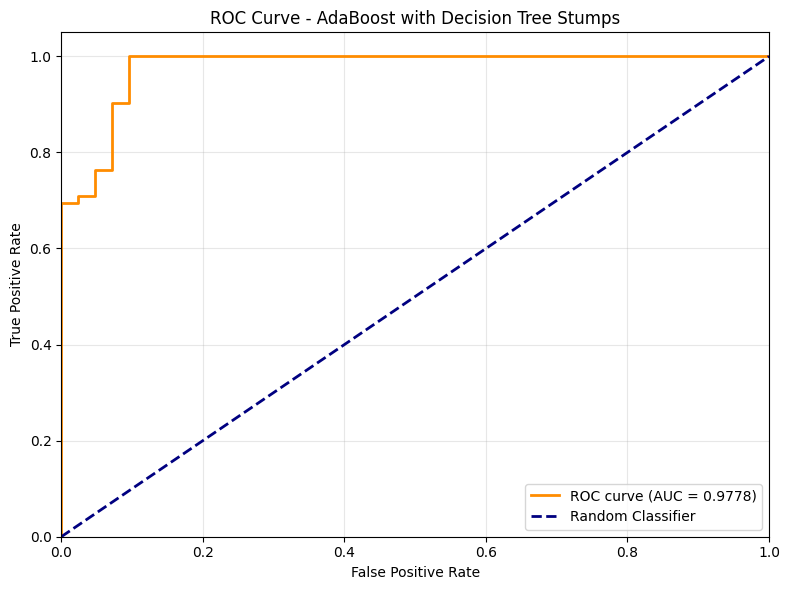


Program completed successfully!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)



# 2. Load data
print("Loading breast cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Dataset shape: {X.shape}")
print(f"Classes: {np.unique(y)}")

# 3. Split data with stratification
print("\nSplitting data with stratification...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# 4. Scale features
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define AdaBoost model with Decision Tree stumps
print("\nDefining AdaBoost model...")
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_boost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

# 6. Train the model
ada_boost.fit(X_train_scaled, y_train)

# 7. Evaluate on test set
print("\n" + "="*50)
print("EVALUATION METRICS")
print("="*50)

y_pred = ada_boost.predict(X_test_scaled)
y_pred_proba = ada_boost.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"TN: {cm[0,0]}, FP: {cm[0,1]}, FN: {cm[1,0]}, TP: {cm[1,1]}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 8. Plot ROC curve
print("\nGenerating ROC curve...")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_plot:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost with Decision Tree Stumps')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nProgram completed successfully!")